## Get the data

In [1]:
import pandas as pd

df = pd.read_csv("../Data/cleaned_dataset.csv")
df

,Mean Temperature,Mean Pressure,Rainfall,Relative Humidity,Mean Cloud,Evaporation,Global Solar Radiation,Max UV,Wind Speed,Mean UV,...,RSP,O3,FSP,Intensity,Signal,Duration(hr min),day_sin,day_cos,wind_sin,wind_cos
0,15.4,1025.1,0.00,68.0,57.0,3.4,18.11,10.072187,6.730814,4.592663,...,43.0,0.0,31.0,0.0,0.0,0.0,0.999991,0.004304,0.173648,0.984808
1,16.6,1025.8,0.00,69.0,79.0,3.1,12.94,9.279723,8.470005,3.780165,...,57.0,0.0,37.0,0.0,0.0,0.0,0.999917,-0.012910,0.173648,0.984808
2,17.5,1023.0,0.00,69.0,53.0,4.0,20.32,10.851292,6.246643,5.183114,...,51.0,0.0,37.0,0.0,0.0,0.0,0.999546,-0.030120,0.173648,0.984808
3,18.5,1018.7,0.00,78.0,89.0,2.8,12.21,11.371977,10.663324,4.197858,...,53.0,-0.0,33.0,0.0,0.0,0.0,0.998880,-0.047321,0.342020,0.939693
4,19.7,1014.7,0.05,85.0,90.0,1.6,11.50,10.239657,11.126056,3.814848,...,54.0,-0.0,33.0,0.0,0.0,0.0,0.997917,-0.064508,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,27.3,1009.3,0.05,73.0,77.0,3.1,9.52,4.000000,12.200000,2.000000,...,24.0,65.0,18.0,0.0,0.0,0.0,-0.891981,0.452072,0.984808,-0.173648
12158,25.8,1010.1,0.05,67.0,83.0,3.0,6.97,4.000000,9.700000,2.000000,...,16.0,28.0,11.0,0.0,0.0,0.0,-0.884068,0.467359,0.500000,0.866025
12159,25.3,1011.1,0.05,69.0,86.0,3.0,9.41,6.000000,8.400000,2.000000,...,19.0,31.0,14.0,0.0,0.0,0.0,-0.875892,0.482508,0.500000,0.866025
12160,26.2,1010.3,0.00,64.0,70.0,5.0,18.57,7.000000,8.300000,3.000000,...,28.0,36.0,20.0,0.0,0.0,0.0,-0.867456,0.497513,0.500000,0.866025


In [2]:
from sklearn.model_selection import train_test_split

tem_train, tem_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

## Modeling

c:\Users\vince\anaconda3\envs\gp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE: 6.641237926649888
Test R²: 0.710


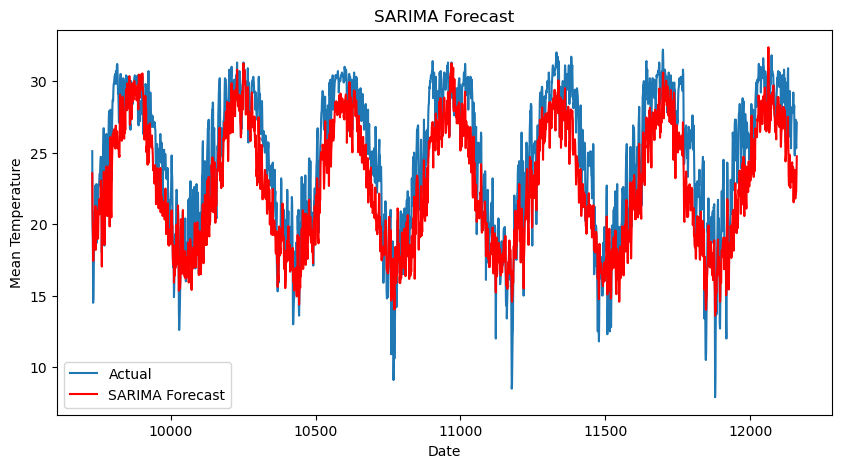

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the SARIMA model parameters
order = (1, 0, 0)

# Select exogenous variables (all columns except 'Mean Temperature')
exog_train = tem_train[[col for col in tem_train.columns if col != "Mean Temperature"]]
exog_test = tem_test[[col for col in tem_test.columns if col != "Mean Temperature"]]

# Fit the SARIMA model
sarima_model = ARIMA(endog=tem_train['Mean Temperature'],
                       exog=exog_train,
                       order=order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_m = sarima_model_fit.predict(start=tem_test.index[0],
                                        end=tem_test.index[-1],
                                        exog=exog_test)

# Calculate error
mse = mean_squared_error(tem_test['Mean Temperature'], sarima_pred_m)
r2 = r2_score(tem_test['Mean Temperature'], sarima_pred_m)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(tem_test.index, tem_test['Mean Temperature'], label='Actual')
plt.plot(tem_test.index, sarima_pred_m, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

MA(1) - Test MSE: 4.703, Test R²: 0.794
MA(2) - Test MSE: 4.614, Test R²: 0.798
MA(3) - Test MSE: 5.361, Test R²: 0.766
ARIMA(0,1,1) - Test MSE: 5.386, Test R²: 0.765
ARIMA(0,1,2) - Test MSE: 4.209, Test R²: 0.816
ARIMA(0,1,3) - Test MSE: 3.600, Test R²: 0.843
AR(1) - Test MSE: 6.641, Test R²: 0.710
ARMA(1,1) - Test MSE: 7.471, Test R²: 0.674
ARMA(1,2) - Test MSE: 8.141, Test R²: 0.644
ARMA(1,3) - Test MSE: 8.920, Test R²: 0.610
ARIMA(1,1,0) - Test MSE: 5.503, Test R²: 0.760
ARIMA(1,1,1) - Test MSE: 5.414, Test R²: 0.763
ARIMA(1,1,2) - Test MSE: 3.449, Test R²: 0.849
ARIMA(1,1,3) - Test MSE: 3.449, Test R²: 0.849
AR(2) - Test MSE: 7.076, Test R²: 0.691
ARMA(2,1) - Test MSE: 4.020, Test R²: 0.824
ARMA(2,2) - Test MSE: 8.851, Test R²: 0.613
ARMA(2,3) - Test MSE: 9.237, Test R²: 0.596
ARIMA(2,1,0) - Test MSE: 4.704, Test R²: 0.794
ARIMA(2,1,1) - Test MSE: 3.967, Test R²: 0.827
ARIMA(2,1,2) - Test MSE: 3.646, Test R²: 0.841
ARIMA(2,1,3) - Test MSE: 3.464, Test R²: 0.849
AR(3) - Test MSE: 7

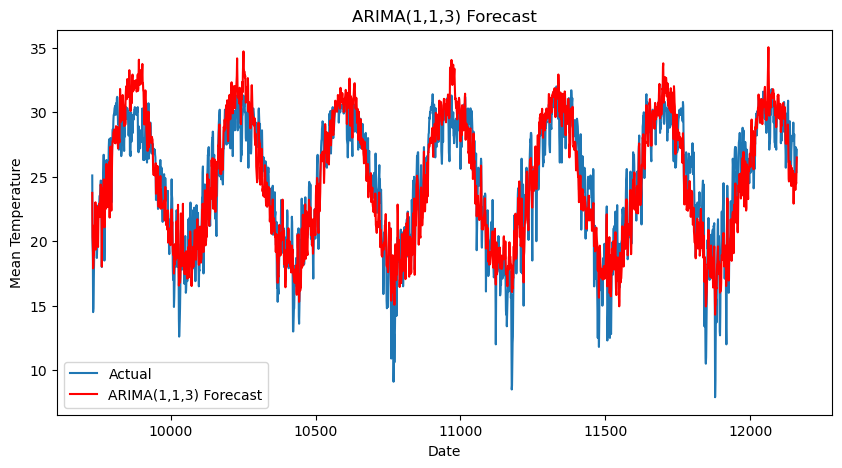

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

def find_best_arima_sequence(train_data, test_data, target_col='Mean Temperature',
                             exog_cols=None, max_p=3, max_d=1, max_q=3, plot=True):

    # Suppress convergence warnings (optional, for cleaner output)
    warnings.filterwarnings("ignore", category=UserWarning)

    # Prepare exogenous variables
    if exog_cols is None:
        exog_train = train_data[[col for col in train_data.columns if col != target_col]]
        exog_test = test_data[[col for col in test_data.columns if col != target_col]]
    else:
        exog_train = train_data[exog_cols]
        exog_test = test_data[exog_cols]

    # If no exogenous variables, set to None
    if exog_train.empty:
        exog_train = None
        exog_test = None

    # Check for missing values and drop them
    if exog_train is not None:
        train_data = train_data.dropna()
        exog_train = exog_train.loc[train_data.index]
        test_data = test_data.dropna()
        exog_test = exog_test.loc[test_data.index]

    # Initialize results
    results = []

    # Test ARIMA models (non-seasonal)
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                # Skip if both p and q are 0 (invalid model)
                if p == 0 and q == 0:
                    continue
                try:
                    # Fit ARIMA model with adjusted optimization settings
                    model = ARIMA(endog=train_data[target_col],
                                  exog=exog_train,
                                  order=(p, d, q))
                    model_fit = model.fit()

                    # Make predictions
                    pred = model_fit.predict(start=test_data.index[0],
                                             end=test_data.index[-1],
                                             exog=exog_test)

                    # Calculate metrics
                    mse = mean_squared_error(test_data[target_col], pred)
                    r2 = r2_score(test_data[target_col], pred)

                    # Store results
                    model_type = f'ARIMA({p},{d},{q})'
                    if p > 0 and q == 0 and d == 0:
                        model_type = f'AR({p})'
                    elif p == 0 and q > 0 and d == 0:
                        model_type = f'MA({q})'
                    elif p > 0 and q > 0 and d == 0:
                        model_type = f'ARMA({p},{q})'

                    results.append({
                        'model': model_type,
                        'order': (p, d, q),
                        'mse': mse,
                        'r2': r2,
                        'predictions': pred,
                        'model_fit': model_fit
                    })
                    print(f'{model_type} - Test MSE: {mse:.3f}, Test R²: {r2:.3f}')
                except Exception as e:
                    print(f'ARIMA({p},{d},{q}) failed: {e}')
                    continue

    # Find the best model (lowest MSE)
    if not results:
        raise ValueError("No models successfully fit the data.")
    best_model = min(results, key=lambda x: x['mse'])

    # Print the best model
    print('\nBest Model:')
    print(f"Model: {best_model['model']}")
    print(f"Test MSE: {best_model['mse']:.3f}")
    print(f"Test R²: {best_model['r2']:.3f}")

    # Plot the best model's forecast
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(test_data.index, test_data[target_col], label='Actual')
        plt.plot(test_data.index, best_model['predictions'], color='red', label=f"{best_model['model']} Forecast")
        plt.xlabel('Date')
        plt.ylabel('Mean Temperature')
        plt.title(f"{best_model['model']} Forecast")
        plt.legend()
        plt.show()

    return best_model, results

# Example usage with your data
best_model, results = find_best_arima_sequence(
    train_data=tem_train,
    test_data=tem_test,
    target_col='Mean Temperature',
    exog_cols=None,  # Will use all columns except 'Mean Temperature'
    max_p=3,  # Reduced for faster computation
    max_d=1,
    max_q=3,
    plot=True
)

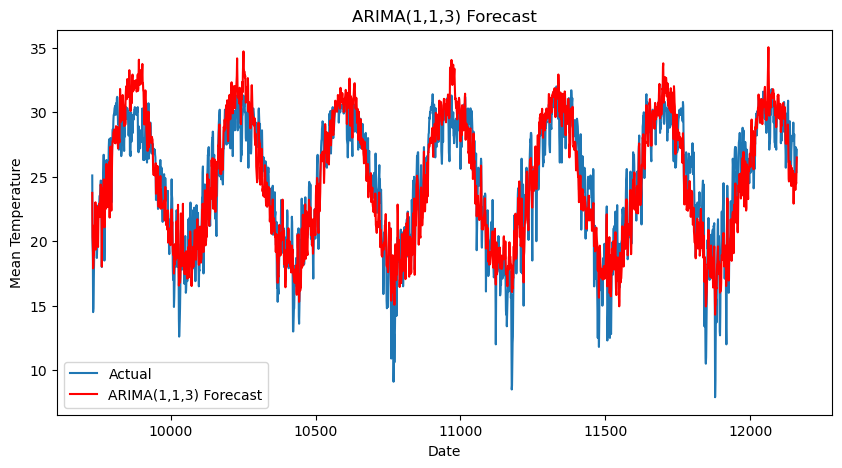

In [7]:
## plot the best model's forecast
plt.figure(figsize=(10, 5))
plt.plot(tem_test.index, tem_test['Mean Temperature'], label='Actual')
plt.plot(tem_test.index, best_model['predictions'], color='red', label=f"{best_model['model']} Forecast")
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title(f"{best_model['model']} Forecast")
plt.legend()
plt.show()

In [8]:
## save the results to a CSV file

results_df = pd.DataFrame(results)
results_df.to_csv("arima_results.csv", index=False)